<a href="https://colab.research.google.com/github/ada-nai/nptel-PMLTF/blob/master/Week%208/TF_Assignment_8_custom_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom training

## Setup

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
tf.random.set_seed(1)

TensorFlow 2.x selected.


## Fit a linear model

Use the concepts you have learned so far—`Tensor`, `Variable`, and `GradientTape`—to build and train a simple model.

Create a simple linear model, `f(x) = x * W + b`, which has two variables: `W` (weights) and `b` (bias). 

### Define the model



In [0]:
# Initialize the weights to `3.0` and the bias to `0.0`
class Model(object):
  def __init__(self):
    self.W = tf.Variable(3.0)
    self.b = tf.Variable(0.0)
  def __call__(self, x):
    return self.W * x + self.b
    

### What will be the output of the model before training if we give x = 3.0 as input?

In [3]:
model = Model()
 
model(3.0)

<tf.Tensor: id=19, shape=(), dtype=float32, numpy=9.0>

### Define a loss function

Use the standard L2 loss:

In [0]:
# write code here
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))


### Obtain training data

First, synthesize the training data by adding random Gaussian (Normal) noise to the inputs:

In [0]:
TRUE_W = 5.0
TRUE_b = 10.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

Before training the model, visualize the loss value by plotting the model's predictions in red and the training data in blue:

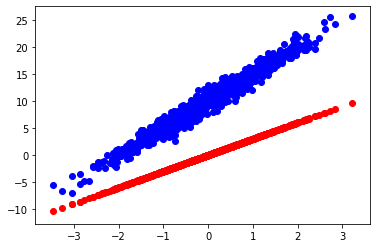

Current loss: 103.322281


In [6]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

### Define a training loop


In [0]:
def train(model, inputs, outputs, learning_rate):
  # write code here 
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)


In [8]:
model = Model()

# Run for 20 epochs
# Use learning rate as 0.1
Ws, bs = [], []
epochs = range(20)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.01)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))


Epoch  0: W=3.00 b=0.00, loss=103.32228
Epoch  1: W=3.03 b=0.20, loss=99.31683
Epoch  2: W=3.07 b=0.39, loss=95.46835
Epoch  3: W=3.10 b=0.58, loss=91.77061
Epoch  4: W=3.14 b=0.77, loss=88.21776
Epoch  5: W=3.17 b=0.95, loss=84.80407
Epoch  6: W=3.20 b=1.13, loss=81.52412
Epoch  7: W=3.23 b=1.31, loss=78.37268
Epoch  8: W=3.26 b=1.48, loss=75.34467
Epoch  9: W=3.29 b=1.65, loss=72.43528
Epoch 10: W=3.32 b=1.81, loss=69.63985
Epoch 11: W=3.35 b=1.98, loss=66.95393
Epoch 12: W=3.38 b=2.13, loss=64.37319
Epoch 13: W=3.41 b=2.29, loss=61.89355
Epoch 14: W=3.43 b=2.44, loss=59.51103
Epoch 15: W=3.46 b=2.59, loss=57.22181
Epoch 16: W=3.49 b=2.74, loss=55.02226
Epoch 17: W=3.52 b=2.88, loss=52.90885
Epoch 18: W=3.54 b=3.02, loss=50.87821
Epoch 19: W=3.57 b=3.16, loss=48.92709


## Learning rate = 0.1

Epoch  9: W=4.65 b=8.61, loss=2.97674

Epoch 19: W=4.94 b=9.83, loss=1.05218

## Learning rate = 0.01
Epoch 19: W=3.57 b=3.16, loss=48.92709